# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Input , Lambda
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D, MaxPooling2D, BatchNormalization
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from glob import glob
import warnings
warnings.filterwarnings("ignore")

In [2]:
# give dataset path
train_path =r'C:\Users\kumar\RiceLeaf disease detection\Data\test' # the 'r' prefix before a string denotes a raw string literal.
test_path = r'C:\Users\kumar\RiceLeaf disease detection\Data\train'

In [3]:
# useful for getting number of classes
train_folders = glob(r'C:\Users\kumar\RiceLeaf disease detection\Data\*')
print(len(train_folders))

3


# Load Dataset:

## Visualizing the Image Data

### 1.Bacterial leaf blight

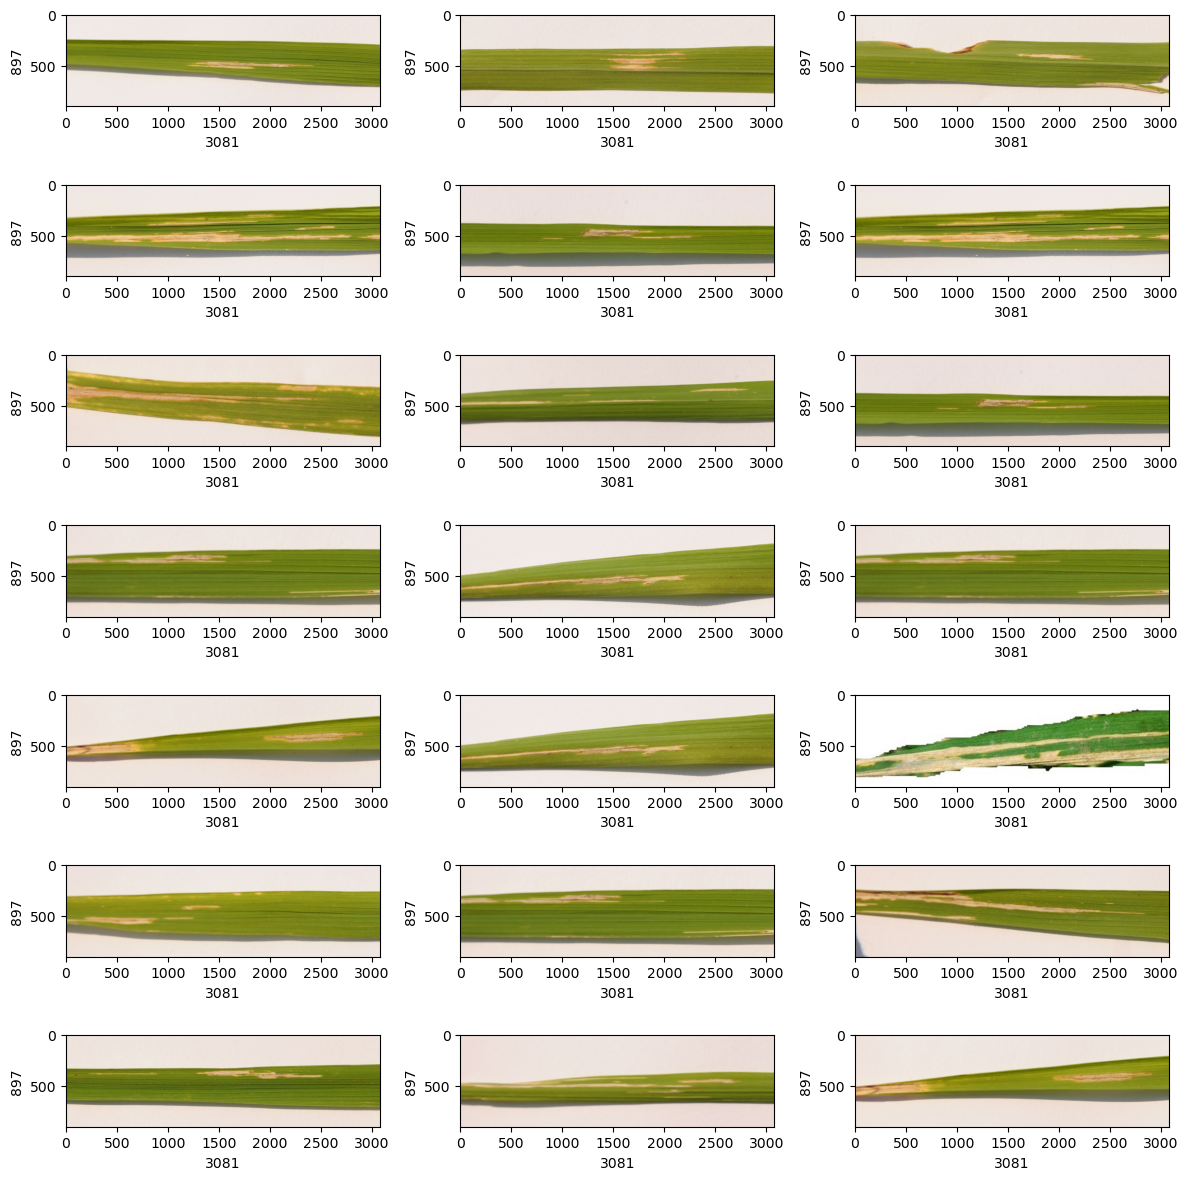

In [4]:
plt.figure(figsize=(12,12))
bacteria_path = r'C:\Users\kumar\RiceLeaf disease detection\Data\Bacterial leaf blight-20200814T055237Z-001\Bacterial leaf blight'
for i in range (1, 22):
    plt.subplot(7 ,3, i)
    plt.tight_layout()
    rand_imp = plt.imread(bacteria_path+'/'+random.choice(sorted(os.listdir(bacteria_path))))
    plt.imshow(rand_imp)
    plt.xlabel(rand_imp.shape[1], fontsize = 10) # width of image.
    plt.ylabel(rand_imp.shape[0], fontsize = 10) # height of image.

### 2.Brown Spot

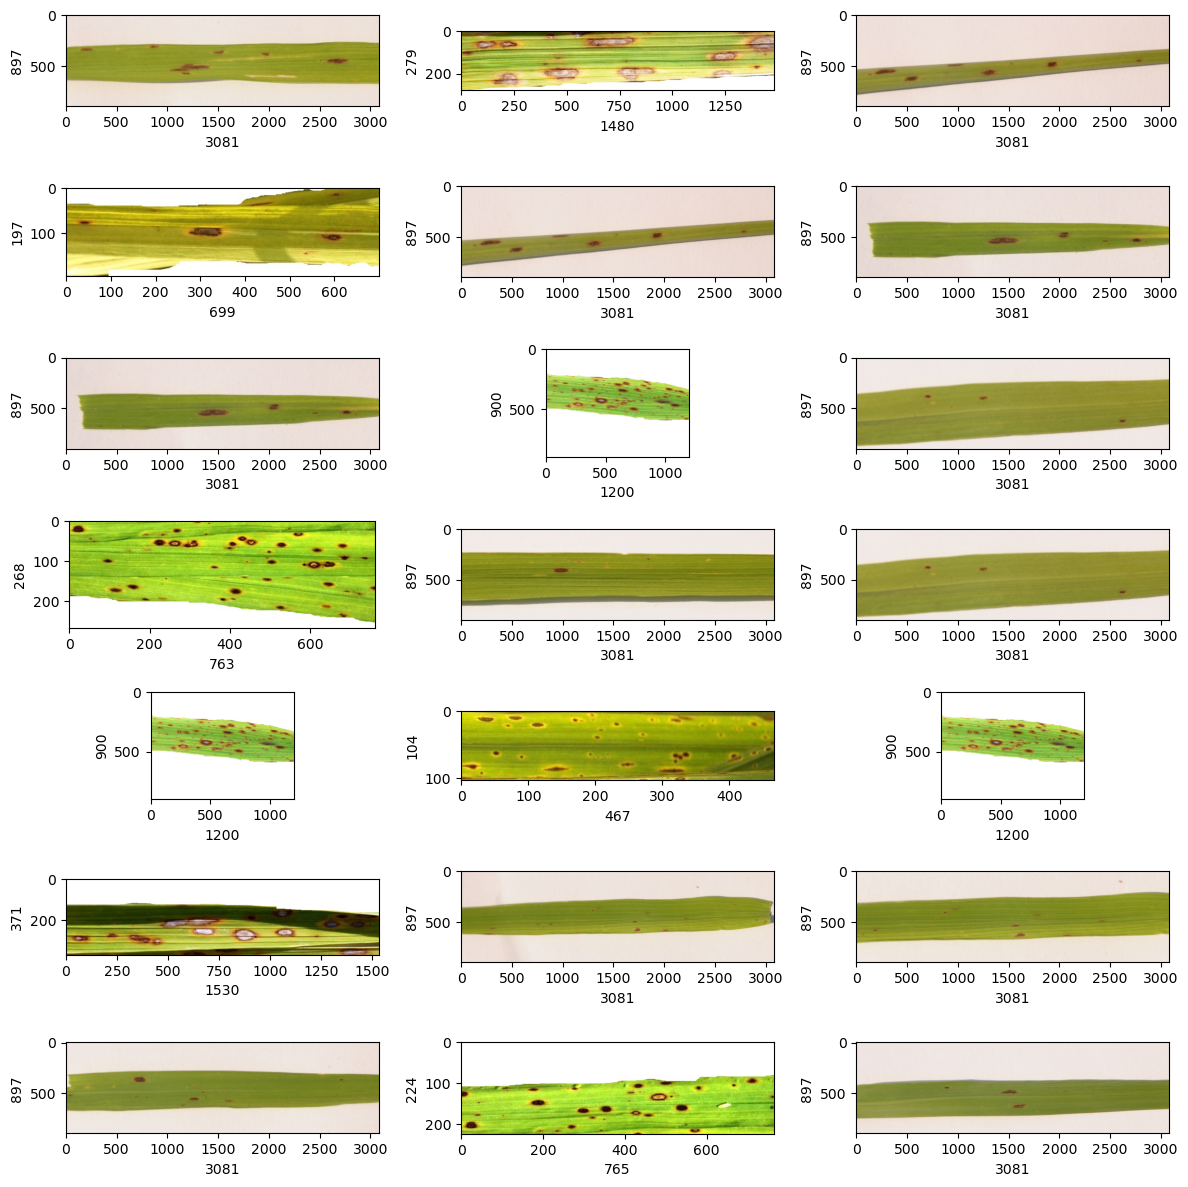

In [5]:
plt.figure(figsize=(12,12))
brown_spot = r'C:\Users\kumar\RiceLeaf disease detection\Data\Brown spot-20200814T055208Z-001\Brown spot'
for i in range (1, 22):
    plt.subplot(7 ,3, i)
    plt.tight_layout()
    rand_imp = plt.imread(brown_spot+'/'+random.choice(sorted(os.listdir(brown_spot))))
    plt.imshow(rand_imp)
    plt.xlabel(rand_imp.shape[1], fontsize = 10) # width of image.
    plt.ylabel(rand_imp.shape[0], fontsize = 10) # height of image.

### 3.Leaf Smut

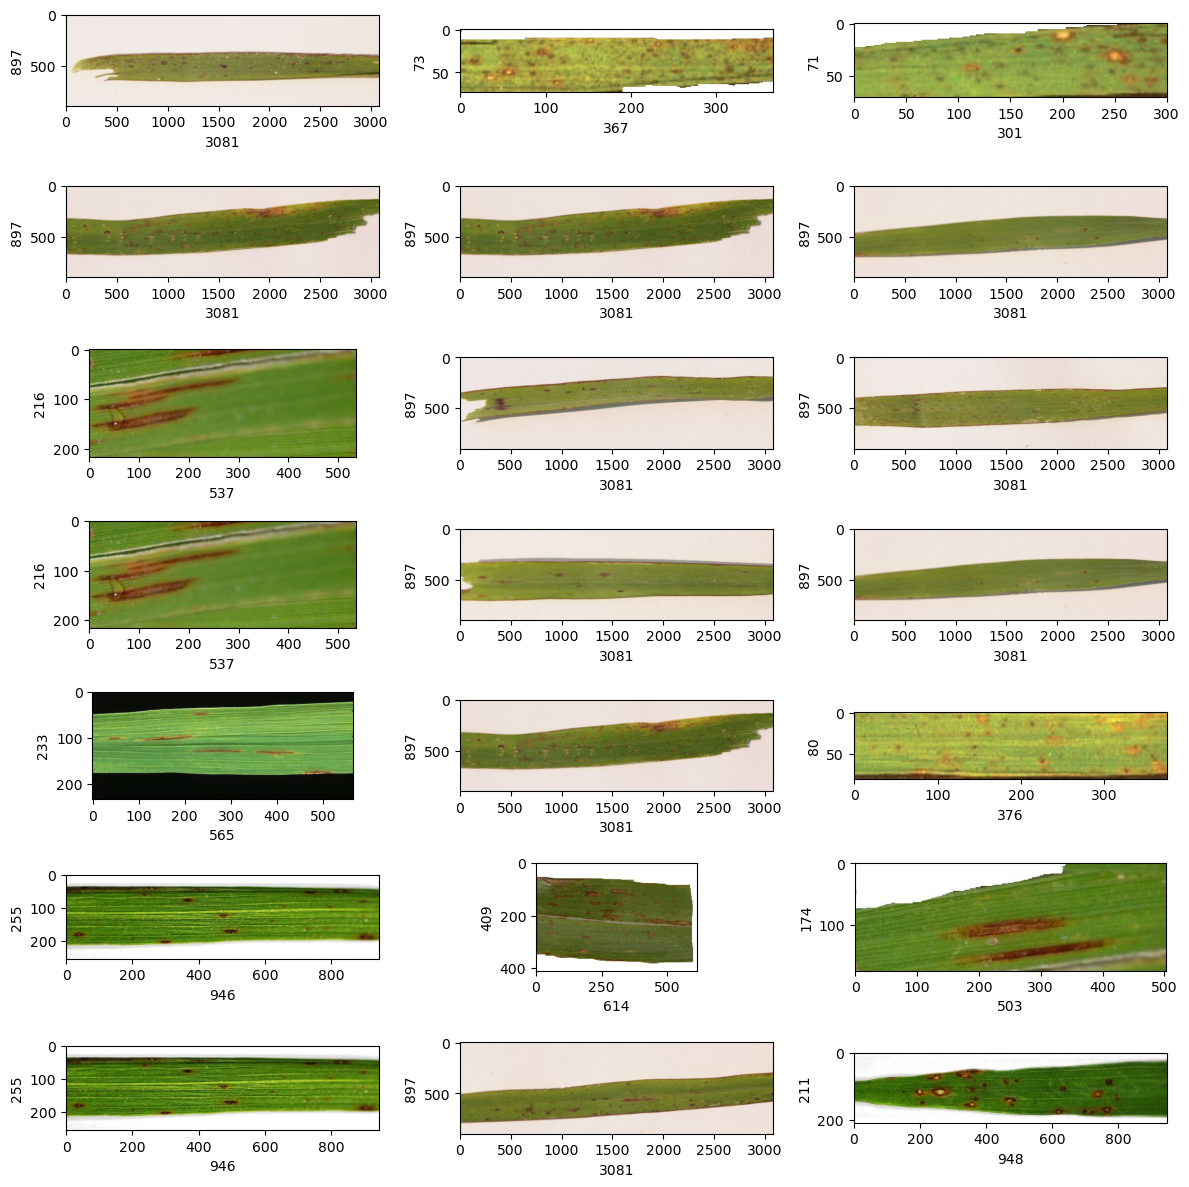

In [6]:
plt.figure(figsize=(12,12))
leaf_smut = r'C:\Users\kumar\RiceLeaf disease detection\Data\Leaf smut-20200814T055530Z-001\Leaf smut'
for i in range (1, 22):
    plt.subplot(7 ,3, i)
    plt.tight_layout()
    rand_imp = plt.imread(leaf_smut+'/'+random.choice(sorted(os.listdir(leaf_smut))))
    plt.imshow(rand_imp)
    plt.xlabel(rand_imp.shape[1], fontsize = 10) # width of image.
    plt.ylabel(rand_imp.shape[0], fontsize = 10) # height of image.

# Data Preprocessing

In [7]:
train_datagen = ImageDataGenerator(rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  rescale= 1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode= "nearest",
                                  validation_split= .25)
test_datagen = ImageDataGenerator(rescale=1./255,
                                 validation_split=.25)

# Data Augumentation

In [8]:
from tensorflow.keras.utils import img_to_array,array_to_img,load_img

### Image Datagenerator Configuration

In [9]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode= "nearest")

### Loading and Preparing an Image

In [10]:
img = load_img(r"C:\Users\kumar\RiceLeaf disease detection\Data\Brown spot-20200814T055208Z-001\Brown spot\DSC_0121.jpg") # This is a Python Imaging Library.
x = img_to_array(img) # This is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,)+ x.shape) # This a Numpy array with shape(1, 3, 150, 150)
# The .flow() command below generates batches of randomly transformed images
# and saves the result to the `preview/` directory

### Applying Data Augmentation and Saving Images:

In [11]:
i = 0
for batch in datagen.flow(x, batch_size=1,
                         save_to_dir=r"C:\Users\kumar\RiceLeaf disease detection\Image Augmentation Example", save_prefix="rice_leaf_brown_spot", save_format="jpeg"):
    i += 1
    if i > 20:
        break  # stops the loop after genrating 20 augmented images.


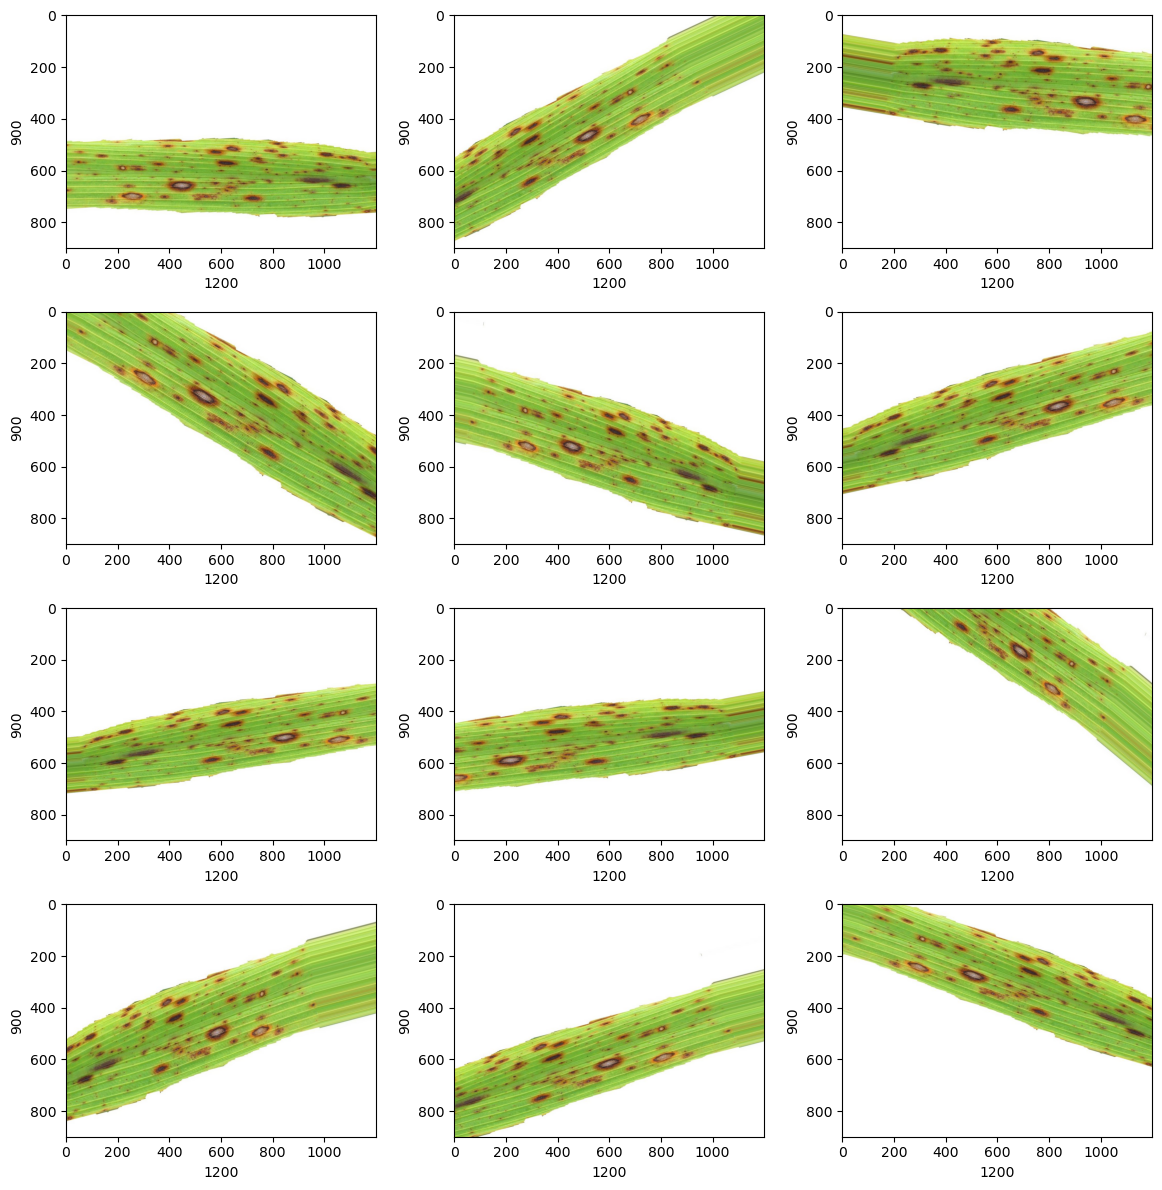

In [12]:
# Visualizing the augmented images
plt.figure(figsize=(12,12))
path = r"C:\Users\kumar\RiceLeaf disease detection\Image Augmentation Example"
for i in range(1, 13):
    plt.subplot(4, 3, i)
    plt.tight_layout()
    rand_imp = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_imp)
    plt.xlabel(rand_imp.shape[1], fontsize = 10) # Width of image.
    plt.ylabel(rand_imp.shape[0], fontsize = 10) # Height of image.

In [13]:
# Rescale images arrays
# Pixel values go from 1-255, we need to rescale them to [0,1]
datagen=ImageDataGenerator(rescale=1./255)

# Generating a Training and Validation set

In [14]:
training_set = train_datagen.flow_from_directory(r"C:\Users\kumar\RiceLeaf disease detection\Data",
                                                target_size= (256, 256),
                                                batch_size=5,
                                                class_mode='categorical',
                                                subset='training')

Found 90 images belonging to 3 classes.


In [15]:
validation_set = train_datagen.flow_from_directory(r"C:\Users\kumar\RiceLeaf disease detection\Data",
                                                target_size= (256, 256),
                                                batch_size=5,
                                                class_mode='categorical',
                                                subset='validation')

Found 29 images belonging to 3 classes.


# 1. Adam (Adaptive Moment Estimation) optimizer

### Define the model Architecture

In [16]:
# Initialising the CNN model:
model_adam = Sequential()

# First Convolution Layer:
model_adam.add(Conv2D(filters= 16, kernel_size=2, activation="relu", input_shape=[256, 256, 3]))

# First Pooling Layer:
model_adam.add(MaxPooling2D(pool_size=2))

# Second Convolution Layer:
model_adam.add(Conv2D(filters=32, kernel_size=2, activation="relu"))

# Second Pooling Layer:
model_adam.add(MaxPooling2D(pool_size=2))

# Third Convolution Layer:
model_adam.add(Conv2D(filters=32, kernel_size=2 , activation="relu"))

# Third Polling Layer:
model_adam.add(MaxPooling2D(pool_size=2))

# Fourth Convolution Layer:
model_adam.add(Conv2D(filters=64, kernel_size=2, activation="relu"))

# Fourth Pooling Layer:
model_adam.add(MaxPooling2D(pool_size=2))

# Flattening:
model_adam.add(Flatten())


# Fully Connected Layer:
model_adam.add(Dense(128, activation="relu"))
# Deactivating 50% of neuron
model_adam.add(Dropout(0.5))


# Output Layer :
model_adam.add(Dense(3, activation="softmax"))
model_adam.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        4128      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)       

In [17]:
# Callback is commonly used during the training of neural networks to stop training early under certain conditions, preventing overfitting and saving computation time
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",            # Metric to monitor for early stopping (validation loss in this case)
                                                min_delta=0.0001,               # Minimum change to qualify as an improvement
                                                patience=20,                    # Number of epochs with no improvement after which training will be stopped
                                                verbose=1,                      # Verbosity mode (1 for detailed output)
                                                mode="auto",                    # Direction of improvement ("auto" determines it automatically)
                                                baseline=None,                  # Baseline value for the monitored metric
                                                restore_best_weights=False,     # Whether to restore model weights from the epoch with the best value of the monitored metric
                                                start_from_epoch=0              # The epoch from which to start counting patience
                                                 )

### Compiling the model

In [18]:
from keras.optimizers import Adam
model_adam.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# Train the model
hist_adam = model_adam.fit_generator(training_set,
                           steps_per_epoch=len(training_set),  # Use len(training_set) if training_set is a generator
                           epochs=50,
                           validation_data=validation_set,
                           validation_steps=len(validation_set),  # Use len(validation_set) if validation_set is a generator
                           )

Epoch 1/50


18/18 [==============================] - 6s 282ms/step - loss: 1.3419 - accuracy: 0.3556 - val_loss: 1.0927 - val_accuracy: 0.4138
Epoch 2/50
18/18 [==============================] - 5s 258ms/step - loss: 1.1130 - accuracy: 0.3111 - val_loss: 1.0824 - val_accuracy: 0.5517
Epoch 3/50
18/18 [==============================] - 4s 247ms/step - loss: 1.0804 - accuracy: 0.4111 - val_loss: 1.0755 - val_accuracy: 0.3793
Epoch 4/50
18/18 [==============================] - 4s 245ms/step - loss: 1.0587 - accuracy: 0.4000 - val_loss: 0.9841 - val_accuracy: 0.5862
Epoch 5/50
18/18 [==============================] - 5s 252ms/step - loss: 1.0796 - accuracy: 0.4889 - val_loss: 2.1252 - val_accuracy: 0.2414
Epoch 6/50
18/18 [==============================] - 5s 264ms/step - loss: 1.1112 - accuracy: 0.3667 - val_loss: 1.0530 - val_accuracy: 0.3448
Epoch 7/50
18/18 [==============================] - 5s 268ms/step - loss: 1.0766 - accuracy: 0.3444 - val_loss: 1.0771 - val_accuracy: 0.5172
Epoc

In [20]:
score_adam=model_adam.evaluate(validation_set,verbose=0)
accuracy_adam=100*score_adam[1]
print('Accuracy CNN model with adam Optimizer:',accuracy_adam)

Accuracy CNN model with adam Optimizer: 79.31034564971924


Text(0.5, 1.0, 'Model Loss')

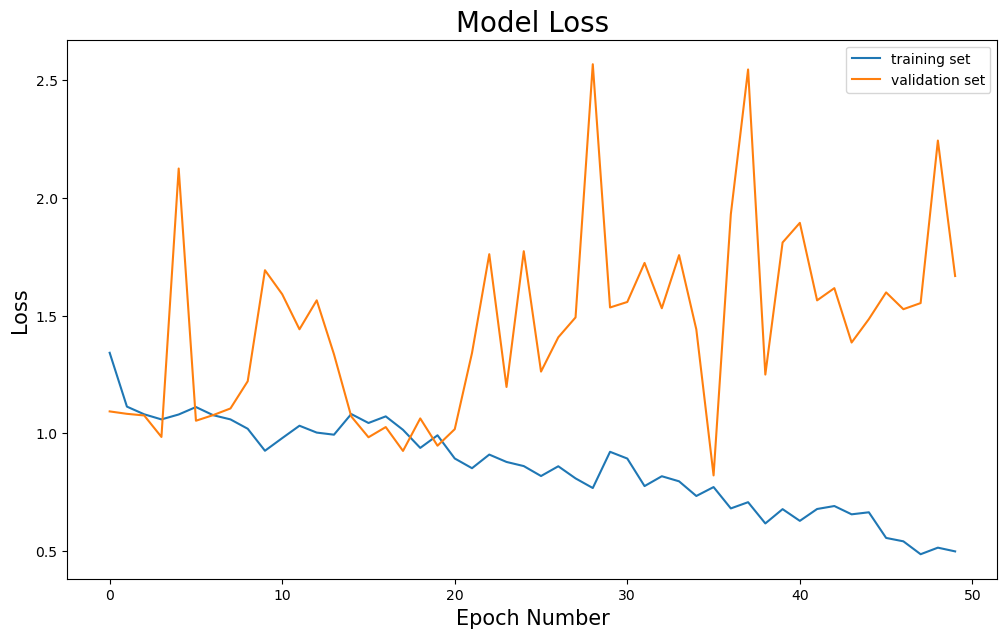

In [21]:
plt.figure(figsize=(12,7))
plt.plot(hist_adam.history['loss'],label='training set')
plt.plot(hist_adam.history['val_loss'],label='validation set')
plt.xlabel('Epoch Number',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.legend()
plt.title('Model Loss',fontsize=20)

Text(0.5, 1.0, 'Model Accuracy')

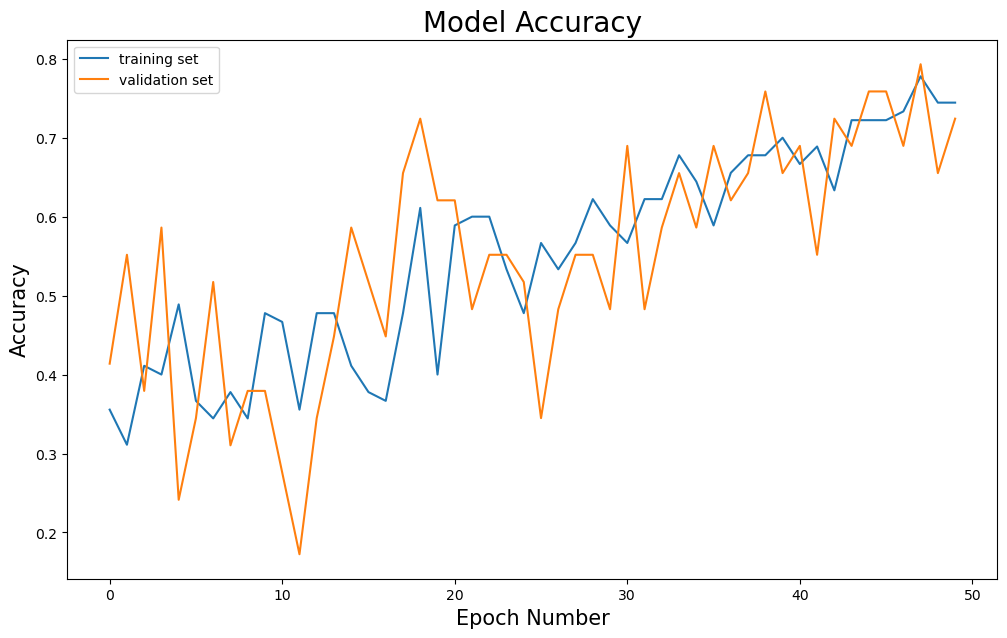

In [22]:
plt.figure(figsize=(12,7))
plt.plot(hist_adam.history['accuracy'],label='training set')
plt.plot(hist_adam.history['val_accuracy'],label='validation set')
plt.xlabel('Epoch Number',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.legend()
plt.title('Model Accuracy',fontsize=20)

# 2. RMSprop (Root Mean Square Propagation)

### Define the model Architecture

In [23]:
# Initialising the CNN model:
model_rms = Sequential()

# First Convolution Layer:
model_rms.add(Conv2D(filters= 16, kernel_size=2, activation="relu", input_shape=[256, 256, 3]))

# First Pooling Layer:
model_rms.add(MaxPooling2D(pool_size=2))

# Second Convolution Layer:
model_rms.add(Conv2D(filters=32, kernel_size=2, activation="relu"))

# Second Pooling Layer:
model_rms.add(MaxPooling2D(pool_size=2))

# Third Convolution Layer:
model_rms.add(Conv2D(filters=32, kernel_size=2 , activation="relu"))

# Third Polling Layer:
model_rms.add(MaxPooling2D(pool_size=2))

# Fourth Convolution Layer:
model_rms.add(Conv2D(filters=64, kernel_size=2, activation="relu"))

# Fourth Pooling Layer:
model_rms.add(MaxPooling2D(pool_size=2))

# Flattening:
model_rms.add(Flatten())


# Fully Connected Layer:
model_rms.add(Dense(128, activation="relu"))
# Deactivating 50% of neuron
model_rms.add(Dropout(0.5))


# Output Layer :
model_rms.add(Dense(3, activation="softmax"))
model_rms.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 255, 255, 16)      208       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 126, 126, 32)      2080      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        4128      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 32)       

### Compiling the model

In [24]:
from keras.optimizers import RMSprop
model_rms.compile(loss= "categorical_crossentropy", optimizer = "RMSprop", metrics="accuracy")

In [25]:
# Train the model
hist_rms = model_rms.fit_generator(training_set,
                                steps_per_epoch=len(training_set),
                                epochs=50,
                                validation_data=validation_set,
                                validation_steps=len(validation_set))

Epoch 1/50
18/18 [==============================] - 5s 259ms/step - loss: 1.1645 - accuracy: 0.3667 - val_loss: 1.0930 - val_accuracy: 0.4483
Epoch 2/50
18/18 [==============================] - 4s 242ms/step - loss: 1.1171 - accuracy: 0.3000 - val_loss: 1.0982 - val_accuracy: 0.3103
Epoch 3/50
18/18 [==============================] - 4s 239ms/step - loss: 1.1085 - accuracy: 0.4111 - val_loss: 1.0887 - val_accuracy: 0.3793
Epoch 4/50
18/18 [==============================] - 4s 243ms/step - loss: 1.1012 - accuracy: 0.3667 - val_loss: 1.0578 - val_accuracy: 0.3448
Epoch 5/50
18/18 [==============================] - 5s 257ms/step - loss: 1.1326 - accuracy: 0.3444 - val_loss: 1.0856 - val_accuracy: 0.2759
Epoch 6/50
18/18 [==============================] - 4s 247ms/step - loss: 1.0899 - accuracy: 0.4222 - val_loss: 1.0343 - val_accuracy: 0.3448
Epoch 7/50
18/18 [==============================] - 4s 251ms/step - loss: 1.0543 - accuracy: 0.4444 - val_loss: 1.1121 - val_accuracy: 0.3448
Epoch 

In [26]:
score_rms=model_rms.evaluate(validation_set,verbose=0)
accuracy_rms=100*score_rms[1]
print('Accuracy CNN model with rms Optimizer:',accuracy_rms)

Accuracy CNN model with rms Optimizer: 82.75862336158752


Text(0.5, 1.0, 'Model Loss')

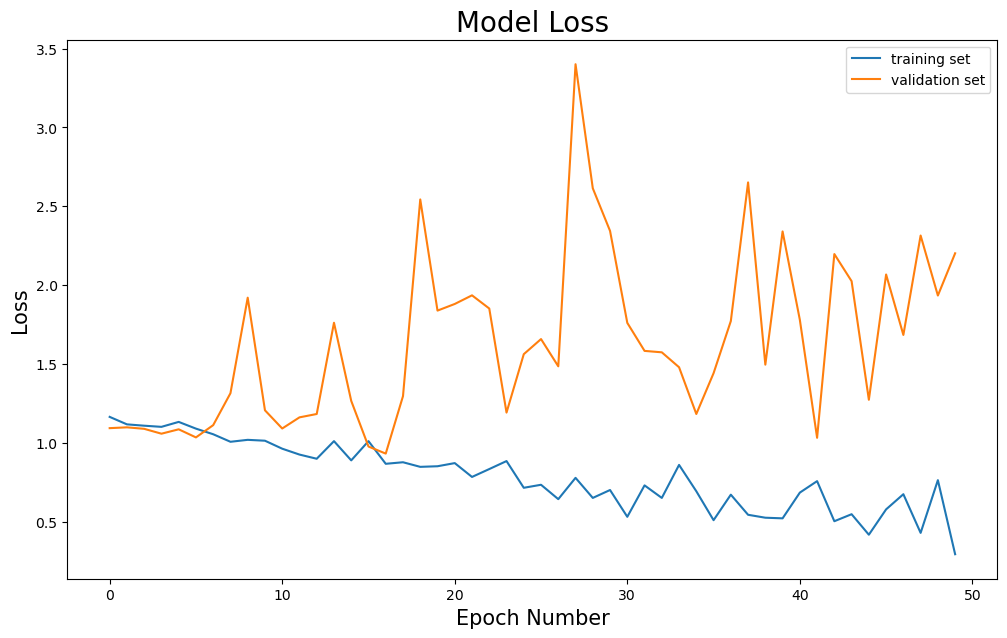

In [27]:
plt.figure(figsize=(12,7))
plt.plot(hist_rms.history['loss'],label='training set')
plt.plot(hist_rms.history['val_loss'],label='validation set')
plt.xlabel('Epoch Number',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.legend()
plt.title('Model Loss',fontsize=20)

Text(0.5, 1.0, 'Model Accuracy')

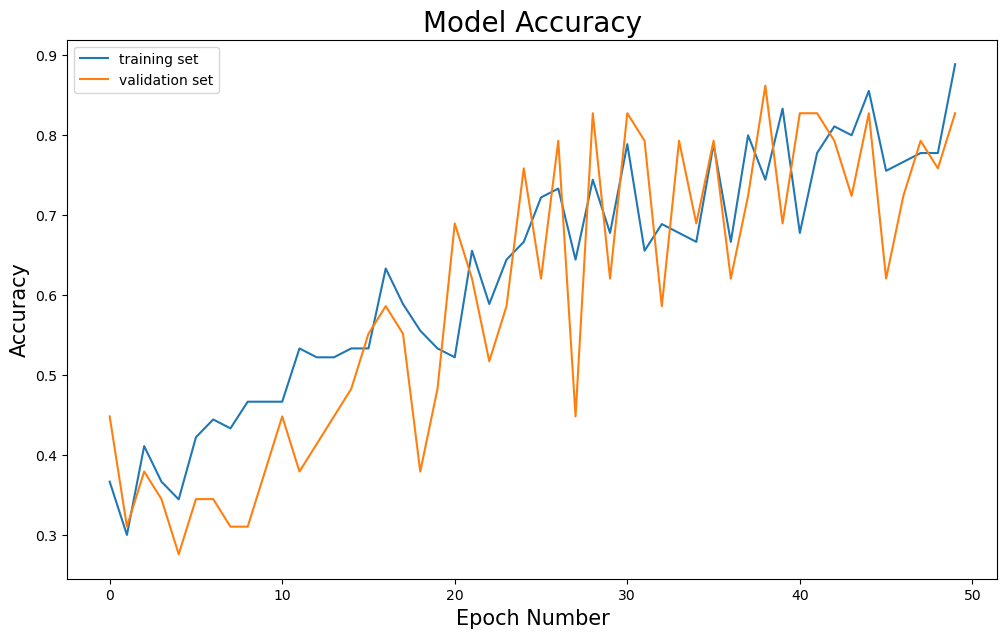

In [28]:
plt.figure(figsize=(12,7))
plt.plot(hist_rms.history['accuracy'],label='training set')
plt.plot(hist_rms.history['val_accuracy'],label='validation set')
plt.xlabel('Epoch Number',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.legend()
plt.title('Model Accuracy',fontsize=20)

# 3. SGD (Stochastic gradient descent)

### Define the model Architecture

In [29]:
# Initialize the CNN model:
model_sgd = Sequential()

# First Convolution Layer:
model_sgd.add(Conv2D(filters=16, kernel_size=2, activation="relu", input_shape=[256, 256, 3]))

# First Pooling Layer:
model_sgd.add(MaxPooling2D(pool_size=2))

# Second Convolution layer:
model_sgd.add(Conv2D(filters= 32, kernel_size=2, activation="relu"))

# Second Pooling layer:
model_sgd.add(MaxPooling2D(pool_size=2))

# Third Convolution Layer:
model_sgd.add(Conv2D(filters= 32, kernel_size=2, activation="relu"))

# Third Pooling layer:
model_sgd.add(MaxPooling2D(pool_size=2))

# Fourth Convolution Layer:
model_sgd.add(Conv2D(filters=64, kernel_size=2, activation="relu"))

# Fourth Pooling Layer:
model_sgd.add(MaxPooling2D(pool_size=2))

# Flattening:
model_sgd.add(Flatten())

# Fully Connected Layer:
model_sgd.add(Dense(128, activation="relu"))
# Deactivating 50% of neuron
model_sgd.add(Dropout(0.5))

# Output Layer:
model_sgd.add(Dense(3, activation="softmax"))
model_sgd.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 255, 255, 16)      208       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      2080      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 62, 62, 32)        4128      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 31, 31, 32)       

### Compiling the model

In [30]:
from keras.optimizers import SGD
model_sgd.compile(loss= "categorical_crossentropy", optimizer = "SGD", metrics="accuracy")

In [31]:
# Training the Model:
hist_sgd = model_sgd.fit_generator(training_set,
                                steps_per_epoch=len(training_set),
                                epochs=50,
                                validation_data=validation_set,
                                validation_steps=len(validation_set))

Epoch 1/50
18/18 [==============================] - 5s 248ms/step - loss: 1.1128 - accuracy: 0.2889 - val_loss: 1.0996 - val_accuracy: 0.3448
Epoch 2/50
18/18 [==============================] - 4s 237ms/step - loss: 1.0937 - accuracy: 0.3889 - val_loss: 1.0878 - val_accuracy: 0.4483
Epoch 3/50
18/18 [==============================] - 4s 238ms/step - loss: 1.1121 - accuracy: 0.2778 - val_loss: 1.0915 - val_accuracy: 0.3448
Epoch 4/50
18/18 [==============================] - 4s 235ms/step - loss: 1.1064 - accuracy: 0.3222 - val_loss: 1.0941 - val_accuracy: 0.4483
Epoch 5/50
18/18 [==============================] - 5s 252ms/step - loss: 1.1058 - accuracy: 0.3111 - val_loss: 1.0903 - val_accuracy: 0.5517
Epoch 6/50
18/18 [==============================] - 4s 237ms/step - loss: 1.0911 - accuracy: 0.4111 - val_loss: 1.0900 - val_accuracy: 0.3793
Epoch 7/50
18/18 [==============================] - 4s 238ms/step - loss: 1.1083 - accuracy: 0.3778 - val_loss: 1.0916 - val_accuracy: 0.4483
Epoch 

In [32]:
score_sgd=model_sgd.evaluate(validation_set,verbose=0)
accuracy_sgd=100*score_sgd[1]
print('Accuracy CNN model with sgd Optimizer:',accuracy_sgd)

Accuracy CNN model with sgd Optimizer: 48.27586114406586


Text(0.5, 1.0, 'Model Loss')

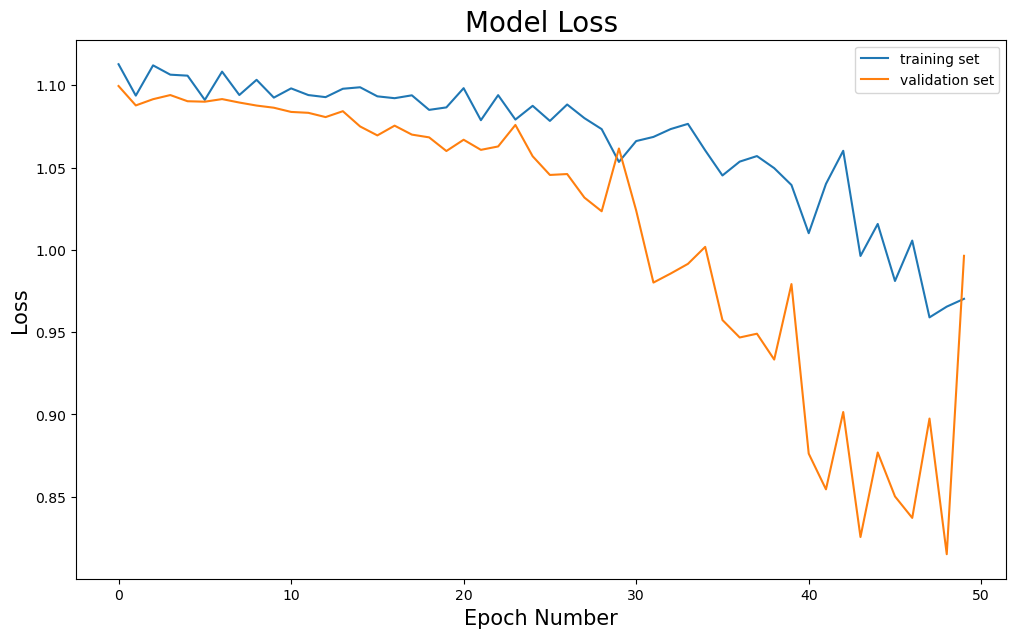

In [33]:
plt.figure(figsize=(12,7))
plt.plot(hist_sgd.history['loss'],label='training set')
plt.plot(hist_sgd.history['val_loss'],label='validation set')
plt.xlabel('Epoch Number',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.legend()
plt.title('Model Loss',fontsize=20)

Text(0.5, 1.0, 'Model Accuracy')

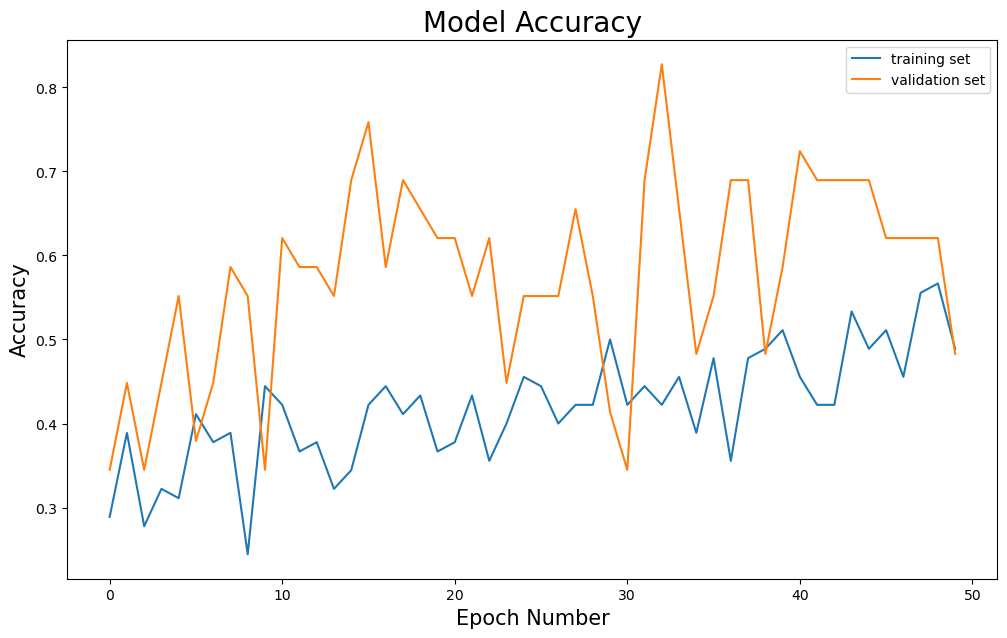

In [34]:
plt.figure(figsize=(12,7))
plt.plot(hist_sgd.history['accuracy'],label='training set')
plt.plot(hist_sgd.history['val_accuracy'],label='validation set')
plt.xlabel('Epoch Number',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.legend()
plt.title('Model Accuracy',fontsize=20)

# Conclusion--

To conclude, the application of Convolutional Neural Networks (CNNs) in predicting rice leaf diseases has yielded promising outcomes, underscoring the pivotal role of optimizer selection in achieving optimal accuracy. The analysis has led to several key insights:

**Optimizers and Accuracy**-- 
- Among the three optimizers scrutinized, **RMS** emerged as the top performer, attaining an impressive accuracy rate of **82.75%**. 

- Followed by RMS is **ADAM** with an acuracy rate of **79.31%** and then with the least accuracy is **SGD** with **48.27%**

- Considering all optimizers, **RMS** emerges as the preferred optimizer for disease prediction in rice leaves.

In summary, the synergy of CNNs with a well-chosen optimizer, such as **RMS**, proves instrumental in accurately predicting rice leaf diseases. The attained high accuracy underscores the potential of deep learning techniques in agriculture, offering a means to identify and address crop diseases promptly, ultimately contributing to enhanced crop yield and global food security.

## CHALLENGES ENCOUNTERED--

**Data Loading Complexity:** One of the initial challenges encountered was the intricacy of loading data, particularly when dealing with extensive datasets or diverse file formats. Overcoming issues related to correct file paths, handling missing or corrupted data, and ensuring data consistency required the implementation of robust data loading mechanisms and effective error-handling strategies.

**Model Training Time Constraints:** The computational intensity and time-consuming nature of training deep learning models, notably CNNs, posed a significant challenge. Large datasets and complex architectures contributed to prolonged training times. Mitigating this challenge involved leveraging efficient hardware, such as GPUs or TPUs, and exploring distributed training methods to expedite the model training process.

**Optimization Algorithm Variability:** Notable variability in model performance, specifically in accuracy, was observed when experimenting with different optimizers, hyperparameters, and random weight initialization. Addressing this challenge involved conducting multiple runs with each optimizer and reporting average performance to provide a more stable basis for comparison.

**Optimal Optimizer Selection:** Selecting the most suitable optimizer proved to be a nuanced task, given the diverse outcomes produced by different optimization algorithms. To address this challenge systematically, thorough hyperparameter tuning, including grid search or random search, was employed for each optimizer. Additionally, cross-validation was instrumental in assessing model stability and generalization performance across various optimizers.

**Resource Limitations:** The inherent resource intensity of training deep learning models, coupled with the need for powerful hardware and substantial memory, presented a notable constraint. Overcoming this challenge required strategic resource allocation and optimization, ensuring that the experiments conducted were within the available computational capabilities.